# Logistic regression and feed forward NN

Today, you will be tinkering with a pure-python feed forward neural network.
- Part 1.1: Tinker with some visuals
- Part 1.2: Train a pure-Python neural network

**Feedback**: I appreciate all feedback but I know it can be intimidating to say negative things to my face, so I've setup a [thingy](https://ulfaslak.com/vent) on my website where you can vent anonymously. Remember to say you are taking this class because I also use it for other things.

In [1]:
%matplotlib inline

import numpy as np
import random
import matplotlib.pylab as plt
from scipy.interpolate import interp1d

## Exercises

### Part 1.1: Tinker with some visuals

Before we dive in to the code, it's really important that our intuition about what neural networks are doing is as good as possible. And the best (and most fun) way to do that is to play around and with things a bit, so go familiarize yourself with the [Tensorflow Playground](https://playground.tensorflow.org/), slide some knobs and pull some levers.

> **Ex. 1.1.1** Using [the dataset](https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.42272&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) with the two well-seperate guassian distributions, create the minimal neural network that seperates the clusters. You can report your answer with a link (the URL on playground.tensorflow.org changes as you update the network, so at any time you can use the link to show others what you have created).

In [2]:
https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=1&seed=0.41208&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false
    

SyntaxError: invalid syntax (<ipython-input-2-f7372cf5fde6>, line 1)

> **Ex. 1.1.2** Using [the dataset](https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.16631&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) with the hard-to-seperate circles, create the minimal neural network that seperates the clusters. Again, report your answer with a link.

In [ ]:
https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,4&seed=0.16631&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=true&ySquared=true&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

> **Ex. 1.1.3** See if you can create a network that performs well on the [the dataset](https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.08961&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) with the intertwined spirals. If possible, include in your answer not only the link but also a screenshot of the scatter plot.

In [ ]:
https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=7,5&seed=0.08961&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=true&xSquared=true&ySquared=true&cosX=false&sinX=true&cosY=false&sinY=true&collectStats=false&problem=classification&initZero=false&hideText=false


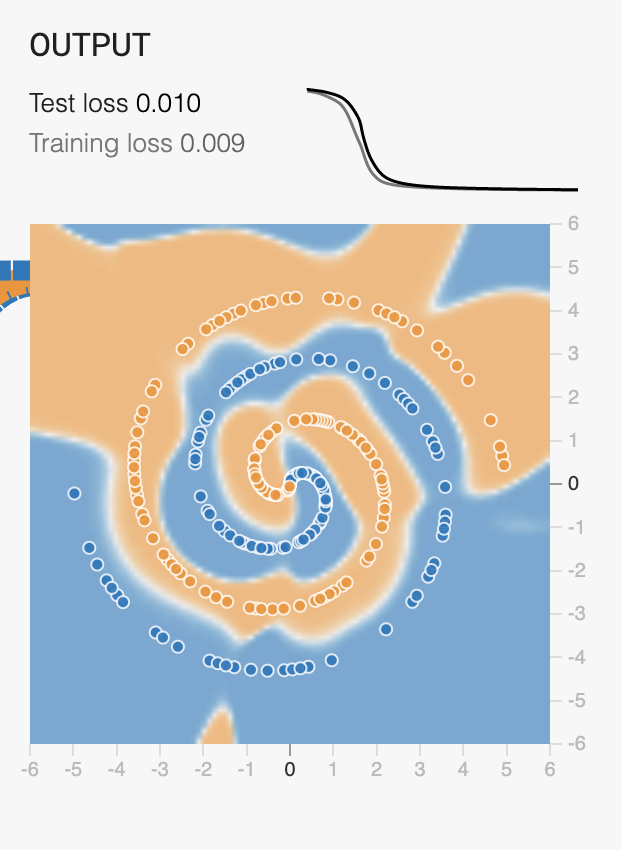

### Part 1.2: A pure-Python neural network

Now, let's inspect Michael Nielsen's neural network. He ends the first chapter of his book by implementing all the stuff he went through, and below I've synthesized this code into a single working example, with some minor readibility edits and updates so it works in Python 3.

In [3]:
# Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1 / (1 + np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z) * (1 - sigmoid(z))

def step(z, threshold=0.5):
    if z > threshold:
        return 1
    return 0

# Feed forward neural network class
class Network(object):

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        
        self.num_layers = len(sizes)
        self.sizes = sizes
        
        # Q: Print these out, explain their contents. You can instantiate a network by
        # doing `net = Network([2, 3, 1])`, and then printing `net.biases`.
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]
        #net.biases shows the biases of each neuron, the starting neurons do not have biases that is why there are only 4 biases
        #net.weights shows the weight between each neuron there are 6 weight in the first layer and 3 in the second

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        
        # Q: What is `a`? How many iterations will this loop run? For a `sizes=[2, 3, 1]`
        # network, what is the shape of `a` at each iteration?
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a) + b)
        return a
        #loop iterates 2 times 1 iteration for each layer of the neural network past the initial layer

    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None, silent=False):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        
        # Ulf: For now we just treat this function as a black box.
        
        n = len(training_data)
        if test_data:
            n_test = len(test_data)
        
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)
            ]
            
            # Q: And what does this step do?
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            #for every mini_batch update the network's weights and biases by applying gradient descent 
            
            if not silent:
                if test_data:
                    print("Epoch {0}: {1} / {2}".format(j, self.evaluate(test_data), n_test))
                else:
                    print("Epoch {0} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        
        # Ulf: For now we just treat this function as a black box.

        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
            
        self.weights = [
            w - eta / len(mini_batch) * nw
            for w, nw in zip(self.weights, nabla_w)
        ]
        self.biases = [
            b - eta / len(mini_batch) * nb
            for b, nb in zip(self.biases, nabla_b)
        ]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        
        # Ulf: For now we just treat this function as a black box.
        
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book. Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on. It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return nabla_b, nabla_w

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        if self.sizes[-1] == 1:
            test_results = [
                (step(self.feedforward(x)), y)
                for x, y in test_data
            ]
        else:
            test_results = [
                (np.argmax(self.feedforward(x)), y)
                for x, y in test_data
            ]
        return sum(int(y_pred == y) for (y_pred, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return output_activations - y

> **Ex. 1.2.1** I want you to inspect the code and gain an understanding of what happend in the `__init__` `feedforward` methods.
For now we treat the rest of the class as a black box.
I've inserted a number of questions as comments in the code and each one starts like `"# Q: "`.
You should now (starting from the top), write (or code) down the answer to each one of them.
>
> *Hint*: You need to closely follow the code. You can verify that your idea of what a variable contains is correct, if you print it. Simply create an instance of the network and you will be able to access the variables of that instance to see what they look like. Example:
>
>     net = Network([2, 3, 1])
>     net.biases  # this gets you the biases property of the network

In [4]:
net = Network([2, 3, 1])
print(net.biases)  # this gets you the biases property of the network
print(net.weights)

[array([[-0.2951592 ],
       [ 1.16042952],
       [-0.33734767]]), array([[-0.85751201]])]
[array([[-0.38814405,  0.75091385],
       [-2.25174971,  0.09404862],
       [-0.24063293, -0.39043937]]), array([[ 0.09545404,  1.69417938, -1.67354933]])]


#### Classifying data

Now let's use this network to classify some points. Remember the examples from my lecture with the two cluster? Below you get some code for generating data like that.

In [5]:
def generate_X_linear(N=200):
    X = np.vstack([
        np.random.normal([-2, -2], 1, size=(int(N/2), 2)),
        np.random.normal([2, 2], 1, size=(int(N/2), 2))
    ])

    y = np.array([0] * int(N/2) + [1] * int(N/2)).reshape(-1, 1)
    
    return X, y

def generate_X_nonlinear(N=200, R=5):
    X_inner = np.random.normal([0, 0], 1, size=(int(N/2), 2))

    X_outer = np.array([
        [R*np.cos(theta), R*np.sin(theta)]
        for theta in np.linspace(0, 2 * np.pi, int(N/2))
    ]) + np.random.randn(int(N/2), 2)

    X = np.vstack([X_inner, X_outer])
    y = np.array([0] * int(N/2) + [1] * int(N/2)).reshape(-1, 1)
    
    return X, y

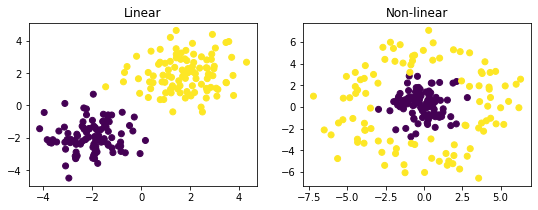

In [6]:
plt.figure(figsize=(9, 3))

X, y = generate_X_linear()
plt.subplot(1, 2, 1)
plt.title("Linear", fontsize=12)
plt.scatter(X[:, 0], X[:, 1], c=list(y.reshape(-1)))

X, y = generate_X_nonlinear()
plt.subplot(1, 2, 2)
plt.title("Non-linear", fontsize=12)
plt.scatter(X[:, 0], X[:, 1], c=list(y.reshape(-1)))

plt.show()

The data needs to be formatted a little different when we give it to Nielsen's code. Basically, it asks for (x, y) tuple pairs, so in each tuple you have a datapoint and it's label. Furthermore, both x and y must be vertical vectors (remember why?). The function below takes `X` and `y` and returns the data in this format:

In [7]:
def prepare_data(X, y):
    """Format the dataset X and y so it fits with Nielsen's code."""
    return [
        (X[i].reshape(-1, 1), y[i].reshape(-1, 1))  # our tuple (x, y)
        for i in range(len(y))
    ]

Also, for the next exercise, you may find the following function useful.

In [8]:
class cmap_in_range:
    """Create map to range of colors inside given domain.

    Example
    -------
    >>> cmap = cmap_in_range([0, 1])
    >>> cmap(0.1)
    (0.30392156862745101, 0.30315267411304353, 0.98816547208125938, 1.0)
    """
    def __init__(self, cmap_domain, cmap_range=[0, 1], cmap_style='rainbow'):
        self.cmap_domain = cmap_domain
        self.cmap_range = cmap_range
        self.m = interp1d(cmap_domain, cmap_range)
        self.cmap = plt.get_cmap(cmap_style)
        
    def __call__(self, value):
        if not self.cmap_domain[0] <= value <= self.cmap_domain[1]:
            raise Exception("Value must be inside cmap_domain.")
        return self.cmap(self.m(value))

> **Ex. 1.2.2**: Create a neural network with `sizes=[2, 1]`. This is actually just our most basic Perceptron model with two inputs and a single output. Generate 1e5 training datapoints and 1e4 testing datapoints using the `generate_X_linear` function, and fit the neural network to this data. Once you've fitted the network, make two plots of your test datapoints, one where points are colored by predictions and another where points are colored by their true labels. Can you say something about the points that are being mislabeled?
>
>*Hint*: You'll probably find some of Nielsen's examples from [Chapter 1](http://neuralnetworksanddeeplearning.com/chap1.html) in his book useful. Also, note that predictions are values between 0 and 1, not hard 0s and 1s, due to the sigmoid activation function. You can deal with this however you like when you color the points by prediction.

> **Ex. 1.2.3**: Now we want to do the same thing as in Ex. 1.2.2, but with the data generated with the `generate_X_nonlinear` function.
>
>*Hint*: Think back to the slides to figure out what `sizes` should be.

In [9]:
Xtr, ytr = generate_X_linear(1e5)
Xte, yte = generate_X_linear(1e4)

train = prepare_data(Xtr, ytr)
test = prepare_data(Xte, yte)

net.SGD(training_data=train,epochs=10,mini_batch_size=100,eta=1)
net.evaluate(test)

Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 5 complete
Epoch 6 complete
Epoch 7 complete
Epoch 8 complete
Epoch 9 complete


9971

In [22]:
[
    net.feedforward(x)[0,0]
    for x in Xte
]


[0.601430817762601,
 0.5969348505126217,
 0.6028031103607444,
 0.602297154065713,
 0.6028447303361056,
 0.6016312182710534,
 0.6027078731137944,
 0.591936142810744,
 0.6027152686999288,
 0.6029656776100084,
 0.6012194600093683,
 0.6023506819185942,
 0.6029936981774441,
 0.6015290949954221,
 0.602317500834137,
 0.6029236068429494,
 0.6002992543058456,
 0.6028578381692808,
 0.6024972225487144,
 0.6030059426200041,
 0.5958355576514818,
 0.602778715976546,
 0.6029629788961731,
 0.6029409539002092,
 0.6029924135538097,
 0.6030034658192711,
 0.603005080122962,
 0.6028892524544873,
 0.6028211278033246,
 0.5848858854037229,
 0.6029887813695177,
 0.6029646459553587,
 0.602571165598391,
 0.6014539561061647,
 0.5894253474791064,
 0.6030058287882304,
 0.6027796953398775,
 0.6029179828947983,
 0.6030092037249727,
 0.6019917343736727,
 0.6029616849910003,
 0.5996327324702413,
 0.6026695867165028,
 0.6006783542029267,
 0.6024029801385999,
 0.6030069164498862,
 0.6021876113648235,
 0.602993473422314,


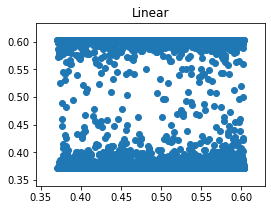

In [14]:

plt.figure(figsize=(9, 3))


plt.subplot(1, 2, 1)
plt.title("Linear", fontsize=12)
plt.scatter([
    net.feedforward(x)[0, 1]
    for x in Xte
], [
    net.feedforward(x)[0, 0]
    for x in Xte
])

#fix this plot
